<h1>Vpython Fisika</h1> 

## Materi dan Software:
* ### Openstax online (free) textbook College Physics.  [**https://openstax.org/details/books/college-physics-2e/**](https://openstax.org/details/books/college-physics-2e/ )

* ### Web VPython atau modul visualisasi 3D. [**http://www.glowscript.org/**](http://www.glowscript.org/)
* ### Google Colaboratory. [**https://colab.research.google.com/**](https://colab.research.google.com/)

<hr>
<div>
    <h2> Pemodelan Gerak Proyektil </h2>
    <ul>
    <li> <h3> Analitik </h3> </li>
    <li> <h3> Numerik </h3> </li>
    </ul>
    <h2>Pemodelan Gerak Orbital </h2>
    <ul>
    <li> <h3> Gerak Satelit </h3> </li>
    <li> <h3> Momentum Bumi Bulan </h3> </li>
    <li> <h3> Energi Potensial Gravitasi </h3> </li>
    <li> <h3> Escape Velocity </h3> </li>    
    </ul>
</div>
<hr>

<h1>  <i>"A Bull’s-Eye Every Time"</i> </h1>
 
<div>
    <font size="3"> 
    <table>
        <tr>
        Sebuah proyektil ditembakkan ke suatu target sedemikian rupa sehingga proyektil tersebut meninggalkan senjatanya pada saat yang sama target tersebut dijatuhkan dari keadaan diam. Tunjukkan bahwa jika kecepatan awalnya diarahkan pada target yang diam, proyektil mengenai target yang jatuh seperti yang ditunjukkan pada Gambar.
        </tr>
        <tr>
            <td>
                 <img src="gun_ball.jpg" width="500"/>
            </td>
        </tr>
        <tr>
            <td>
            <img src="gun_falling_obj.png" width="500"/>
            </td>
            <td>
                <font size="3">
               $$ y_{T} = y_{0T} − \tfrac{1}{2} g t^2 $$
               $$ y_{P} = v_{0yP}\;t - \tfrac{1}{2} g t^2 $$
               $$ x_{P} = v_{0xP}\;t $$
                </font>
            </td>
        </tr>   
   </table>
  </font> 
</div>

In [ ]:
from vpython import *
scene = canvas()

# bola_p = sphere(pos=vector(0,0,0))
bola_P = sphere(pos=vector(-20,0,0), color=color.yellow, make_trail=True)
bola_T = sphere(pos=vector(0,20,0), color=color.cyan, make_trail=True)

g = 9.8
bola_P.v = vector(11,11,0)
bola_T.v = vector(0,0,0)
dt = 0.004
t = 0
y0_P = bola_P.pos.y
x0_P = bola_P.pos.x
y0_T = bola_T.pos.y
x0_T = bola_T.pos.x

from vpython import *
scene = canvas()

bola_P = sphere(pos=vector(-20,0,0), color=color.yellow, make_trail=True)
bola_T = sphere(pos=vector(0,20,0), color=color.cyan, make_trail=True)

g = 9.8
bola_P.v = vector(11,11,0)
bola_T.v = vector(0,0,0)
dt = 0.004
t = 0
y0_P = bola_P.pos.y
x0_P = bola_P.pos.x
y0_T = bola_T.pos.y
x0_T = bola_T.pos.x

while t<=3:
    rate(100)
    bola_T.pos.y = y0_T - 0.5*g*t**2
    bola_P.pos.x = x0_P + bola_P.v.x * t
    bola_P.pos.y = y0_P + bola_P.v.y * t - 0.5*g*t**2
    if round(bola_T.pos.y,1) == round(bola_P.pos.y,1):
        break
    t = t + dt
print(round(bola_T.pos.y,1), ' ', round(bola_P.pos.y,1))

<h1>  <i>"That’s Quite an Arm!"</i> </h1>

  * #### Modul sympy

<center>
<font size="3">
<div>
   <img src="projectile_path.png" width="500"/>
$$ v_{0x} = v_0 \cos(\theta)$$
$$ v_{0y} = v_0 \sin(\theta)$$

$$ v_x = v_{0x}$$
$$ x = v_{0x}t$$

$$ v_y = v_{0y} -gt$$

$$ y = y_0 + v_{0y}t - \tfrac{1}{2}gt^2$$

$$ v_y^2=v_{0y}^2 − 2𝑔(y−y_0)$$

Waktu hingga mencapai target di tanah $(x,0)$ :

$$ t_{hit} = \frac{\left (v_{0y} + \sqrt{v_{0y}^2 + 2gy_0} \right )}{g} $$
</div>
</font>
</center>

In [6]:
import sympy as sp
x, x0, y, y0, t, g, theta, v0 = sp.symbols('x x0 y y0 t g theta v0')

In [18]:
x_eq = sp.Eq(x0 - x -v0*sp.cos(theta)*t, 0)
x_eq

Eq(-t*v0*cos(theta) - x + x0, 0)

In [13]:
y_eq = sp.Eq(y0 - y + v0*sp.sin(theta)*t - sp.Rational(1,2)*g*t**2, 0)
y_eq

Eq(-g*t**2/2 + t*v0*sin(theta) - y + y0, 0)

In [14]:
t_sol = sp.solve(y_eq, t)
t_sol

[(v0*sin(theta) - sqrt(-2*g*y + 2*g*y0 + v0**2*sin(theta)**2))/g,
 (v0*sin(theta) + sqrt(-2*g*y + 2*g*y0 + v0**2*sin(theta)**2))/g]

In [16]:
t_sol[1]

(v0*sin(theta) + sqrt(-2*g*y + 2*g*y0 + v0**2*sin(theta)**2))/g

In [17]:
t_sol[1].subs(y, 0)

(v0*sin(theta) + sqrt(2*g*y0 + v0**2*sin(theta)**2))/g

In [19]:
x_eq2 = x_eq.subs(t, t_sol[1])
x_eq2

Eq(-x + x0 - v0*(v0*sin(theta) + sqrt(-2*g*y + 2*g*y0 + v0**2*sin(theta)**2))*cos(theta)/g, 0)

In [20]:
x_eq2.simplify()

Eq((g*(-x + x0) - v0*(v0*sin(theta) + sqrt(-2*g*y + 2*g*y0 + v0**2*sin(theta)**2))*cos(theta))/g, 0)

In [24]:
x_f[0].simplify()

(g*x0 - v0**2*sin(2*theta)/2 - v0*sqrt(-2*g*y + 2*g*y0 + v0**2*sin(theta)**2)*cos(theta))/g

In [26]:
xf_num = sp.lambdify((x,x0,y,y0,t,g,theta,v0), x_f[0])

xf_num(0,0,0,1,0, 9.81 , 0.2 ,5) 

-2.7637733197671626

In [19]:
thetas = np.linspace(0, np.pi/2, 100)

In [20]:
xf_v = xf_num(0,0,0,1,0,9.81,thetas,10)

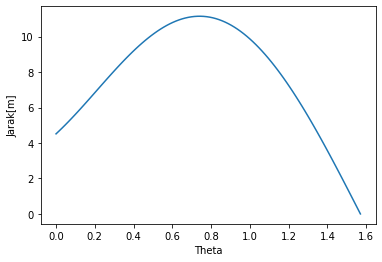

In [21]:
plt.plot(thetas, xf_v)
plt.xlabel('Theta')
plt.ylabel('Jarak[m]')
plt.show()

In [22]:
v0f = sp.solve(x_eq2, v0)
v0f

[sqrt(g/(x*sin(2*theta) - x0*sin(2*theta) - y*cos(2*theta) - y + y0*cos(2*theta) + y0))*(-x + x0),
 sqrt(g/(x*sin(2*theta) - x0*sin(2*theta) - y*cos(2*theta) - y + y0*cos(2*theta) + y0))*(x - x0)]

In [23]:
v0f[0].simplify()

sqrt(g/(x*sin(2*theta) - x0*sin(2*theta) - y*cos(2*theta) - y + y0*cos(2*theta) + y0))*(-x + x0)

In [24]:
v0f_num = sp.lambdify((x,x0,y,y0,t,g,theta), v0f[0])
v0f_num(0,1,0,1,0,9.81,0.2)

2.530788065990598

In [26]:
v0f_v = v0f_num(0,10,0,10,0,9.81,thetas)

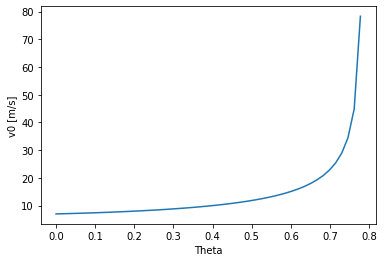

In [28]:
plt.plot(thetas, v0f_v)
plt.xlabel('Theta')
plt.ylabel('v0 [m/s]')
plt.show()

## Pendekatan Numerik pada Gerak Benda
  
<div>
<font size="3">
$$ v_y = \frac{dy}{dt} ≈ \frac{∆y}{∆t} ≈ \frac{y_f − y_i}{∆t} $$
$$ y_f ≈ y_i + v_y ∆t $$
$$ v_{yf} ≈ v_{yi} + ay ∆t$$

$$ a_y = \frac{\sum F_y}{m}$$

$$ a_y = −g $$

</font>
</div>

* ### Update Variabel secara Vektor
  
$$ \vec{a} = \frac{\vec{F}}{m}$$
$$ \vec{a} = \vec{g}$$

$$ \vec{v} = \vec{v} + \vec{a} \Delta t $$
$$ \vec{r} = \vec{r} + \vec{v} \Delta t $$

In [5]:
from vpython import *
scene = canvas()

bola = sphere(pos=vector(0,20,0), make_trail=True) 
g = 9.81
bola.v = vector(10,15,0)
dt = 0.004
y = bola.pos.y
t = 0
a = vector(0,-g,0)

while bola.pos.y>0:
    rate(100)
    bola.v = bola.v + a*dt
    bola.pos = bola.pos + bola.v*dt
    t += dt

<IPython.core.display.Javascript object>

## Gerak Proyektil tanpa Hambatan Udara

In [1]:
from vpython import *
scene = canvas()

ball = sphere(pos=vector(0,0.1,0), radius=0.05, color=color.yellow, make_trail=True)
ground = box(pos=vector(0,0,0), size=vector(2.5,0.02,0.25))

g1 = graph(xtitle="t [s]", ytitle="y [m]")
f1 = gcurve(color=color.blue)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
f1 = gcurve(color=color.blue)
g = vector(0,-9.8,0)
ball.m = 0.05
v0=3.2
theta=60*pi/180

ball.v = v0*vector(cos(theta),sin(theta),0)
vscale=.1

In [3]:
varrow = arrow(pos=ball.pos, axis=vscale*ball.v, color=color.cyan)

In [4]:
t = 0
dt = 0.001

while ball.pos.y>=ground.pos.y+ball.radius+ground.size.y:
  rate(100)
  F = ball.m*g
  a = F/ball.m
  ball.v = ball.v + a*dt
  ball.pos = ball.pos + ball.v*dt
  varrow.pos = ball.pos
  varrow.axis=vscale*ball.v
  t = t + dt
  f1.plot(t, ball.pos.y)

## Gerak Proyektil dengan Hambatan Udara
  
<div>
<center>
<img src="fdrag.png" width="300"/>
</center>
<font size="4">
$$ \vec{F}_a = - \tfrac{1}{2} \rho C A |\vec{v}|^2 \hat{v}$$
$$ \vec{F} = \frac{\Delta \vec{p}}{\Delta t}$$
$$ \vec{p} = m \vec{v}$$

$$ \vec{F}_a = - \tfrac{1}{2} \rho C A \frac{|\vec{p}|^2}{m^2} \hat{p}$$

</font>
</div>

In [ ]:
from vpython import *
scene = canvas()

ball = sphere(pos=vector(-2,.1,0), radius=0.05, color=color.yellow, make_trail=True)
ground = box(pos=vector(0,0,0), size=vector(4.5,0.02,0.25))
g1 = graph(xtitle="t [s]", ytitle="y [m]")
f1 = gcurve(color=color.blue)
g = vector(0,-9.8,0)
ball.m = 0.05
v0=7.2
theta=73*pi/180

ball.p = ball.m*v0*vector(cos(theta),sin(theta),0)
vscale=.1

# varrow = arrow(pos=ball.pos, axis=vscale*ball.v, color=color.cyan)
ball2 = sphere(pos=ball.pos, radius=ball.radius, color=color.red, make_trail=True)
ball2.m = 0.005
ball2.p = ball2.m*v0*vector(cos(theta),sin(theta),0)
rho = 1.2
A = pi*ball2.radius**2
C = 0.47

t = 0
dt = 0.005

while ball.pos.y>=ground.pos.y+ball.radius+ground.size.y:
  rate(100)
  F = ball.m*g
  F2 = ball2.m*g - 0.5*rho*A*C*(mag(ball2.p))**2*norm(ball2.p)/(ball2.m)**2
  
  ball.p = ball.p + F*dt
  ball2.p = ball2.p +F2*dt
    
  ball.pos = ball.pos + ball.p*dt/ball.m
  ball2.pos = ball2.pos + ball2.p*dt/ball2.m
#  varrow.pos = ball.pos
#  varrow.axis=vscale*ball.v
  t = t + dt
  f1.plot(t,ball.pos.y)

## Gerak Satelit

<div>
    <table>
        <tr>
            <td>
            <img src="orbital.png" width="300"/>
            </td>
            <td>
                $$ G = 6.67 \times 10^{-11} \; N m^2 kg^{-2}$$
                $$ M = 5.972 \times 10^{24} \; kg $$
                $$ R = 6.37 \times 10^6  \; m$$
                <br>
                $$ F = ma \rightarrow \frac {GMm}{r^2}  = \frac{mv^2}{r}$$
                $$ v = \sqrt{\frac{GM}{r}}$$
            </td>
        </tr>       
   </table>

#### Perhitungan dalam bentuk vektor
  
   $$ \vec{F} = - \frac{GMm}{|\vec{r}|^2} \hat{r} $$
   
   $$ \vec{r} = r_x \hat{i} + r_y \hat{j} + r_z \hat{k} $$

   $$ |\vec{r}| = \sqrt{{r_x}^2 + {r_y}^2 + {r_z}^2} $$

   $$ \hat{r} = \frac{\vec{r}}{|\vec{r}| }$$
   
   $$ \vec{a} = - \frac{GM}{|\vec{r}|^2} \hat{r}$$

</div>

In [1]:
from vpython import *
scene = canvas()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
G = 6.67e-11
M = 5.972e24
R = 6.37e6

bumi = sphere(pos=vector(0,0,0), radius=R, m=M, texture=textures.earth)

In [4]:
satelit = sphere(pos=vector(2*R,0,0), radius=R/10, m=1000, color=color.yellow, make_trail=True)

In [5]:
t = 0
dt = 30

vc = sqrt(G*bumi.m/mag(satelit.pos))

satelit.v = vector(0.3*vc, 0.9*vc, 0)

In [6]:
while t<60*60*24:
    rate(100)
    r = satelit.pos
    m = satelit.m
    M = bumi.m
    F = -G*M*m*norm(r)/mag(r)**2
    a = F/m   
    satelit.v = satelit.v + a*dt    
    satelit.pos = satelit.pos + satelit.v*dt   
    t = t + dt
    

### Momentum pada sistem Bumi Bulan

In [1]:
from vpython import *
scene = canvas()

g1 = graph(title="Earth moon",xtitle="t [s]",ytitle="Px [kg*m/s]",width=400, height=200)
fm = gcurve(color=color.blue)
fe = gcurve(color=color.red)
ft = gcurve(color=color.purple)
G = 6.67e-11
ME = 5.97e24
RE = 6.3e6
rem = 384.4e6
Rm = 1.74e6
Mm= 7.37e22

earth= sphere(pos=vector(0,0,0),radius=RE, texture=textures.earth,make_trail=True)
moon = sphere(pos=vector(rem,0,0),radius=2*Rm,make_trail=True)

dt = 500
t = 0
vm = sqrt(G*ME/rem)*vector(0,1,0)
ve = -Mm*vm/ME

while t<50*24*3600:
  rate(1000)
  r = moon.pos-earth.pos
  Fm = -G*ME*Mm*norm(r)/mag(r)**2
  am = Fm/Mm
  ae = -Fm/ME
  vm = vm + am*dt
  ve = ve + ae*dt
  moon.pos = moon.pos +vm*dt
  earth.pos = earth.pos + ve*dt
  pm = Mm*vm
  pe = ME*ve
  fm.plot(t,pm.y)
  fe.plot(t,pe.y)
  ft.plot(t,pm.y+pe.y)
  t = t + dt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Energi Potensial Gravitasi

$$ \vec{F} = - \frac{GMm}{|\vec{r}|^2} \hat{r} $$

$$ {U=-{\frac {GMm}{R}}} $$

$$ K_f = \tfrac{1}{2}m {v_f}^2 $$

$$ K_{ft} = \frac{GMm}{R} - \frac{GMm}{3R} $$

$$ dW = Fv dt $$

$$ W = \sum{dW} $$

In [2]:
from vpython import *
scene = canvas()

G = 6.67e-11
ME = 5.972e24
R = 6.3e6
m = 1

earth=sphere(pos=vector(0,0,0),radius=R,texture=textures.earth)
ball = sphere(pos=vector(3*R,0,0),radius=R/20, color=color.yellow, make_trail=True)

v = vector(0,0,0)
t = 0
dt = 1
W = 0

while mag(ball.pos)>R:
  rate(1000)
  r = ball.pos
  F = -(G*ME*m/mag(r)**2)*vector(1,0,0)
  a = F/m
  v = v + a*dt
  ball.pos = ball.pos + v*dt
  dW = mag(F)*mag(v)*dt
  W = W + dW
  t = t + dt

print("Energi Kinetik final = ",.5*m*mag(v)**2," J")
Kft = G*ME*m/R - G*ME*m/(3*R)
print("Energi Kinetik final (Hk. Kek. Energi Mekanik) = ",Kft," J")
print("Kerja = ",W," J")

<IPython.core.display.Javascript object>

Energi Kinetik final =  42123324.829076484  J
Energi Kinetik final (Hk. Kek. Energi Mekanik) =  42151576.719576724  J
Kerja =  42139349.98322505  J


* ### Escape Velocity

<div>
<center>
<img src="escape_vel.png" width="250"/>
</center>
<font size="4">
$$ \tfrac{1}{2}mv^2 - \frac{GM_E\;m}{R_E} = - \frac{GM_E\;m}{r_{max}}$$
    
$$ v^2 = 2GM_E \left ( \frac{1}{R_E} - \frac{1}{r_{max}}\right )$$

$$ r_{max} \rightarrow \infty $$

$$ v_{esc} = \sqrt{\frac{2GM_E}{R_E}}$$

</font>
</div>

In [ ]:
from vpython import *
scene = canvas()

g1 = graph(xtitle="r [m]",ytitle="E [J]",width=400, height=200)
fK = gcurve(color=color.red, dot=True)
fU = gcurve(color=color.blue, dot = True)
fE = gcurve(color=color.purple, dot = True)
G = 6.67e-11
ME = 5.97e24
R = 6.3e6
m = 100
v1 = .8*sqrt(2*G*ME/R)
v = vector(v1*cos(pi/4),v1*sin(pi/4),0)
t = 0 
dt = 1

earth = sphere(pos=vector(0,0,0),radius=R, texture=textures.earth)
ball = sphere(pos=vector(R,0,0),radius=R/20, color=color.yellow, make_trail=True)

while t <8600:
  rate(1000)
  r = ball.pos
  F = -G*ME*m*norm(r)/mag(r)**2
  a = F/m
  v = v + a*dt
  ball.pos = ball.pos + v*dt
  K = .5*m*mag(v)**2
  U = - G*ME*m/mag(r)
  E = K + U
  fK.plot(mag(r),K)
  fU.plot(mag(r),U)
  fE.plot(mag(r),E)
  t = t + dt

r2 = G*ME/(-.5*v1**2+G*ME/R)
print("r2 = ",r2," m")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>